In [71]:
import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
warnings.simplefilter(action='ignore')

In [80]:
!pip install yfinance
import yfinance as yf
ticker = ['AXISBANK.NS','ASIANPAINT.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BHARTIARTL.NS','DRREDDY.NS','HCLTECH.NS','HDFCBANK.NS','HINDUNILVR.NS','HDFC.NS',
          'ICICIBANK.NS','ITC.NS','INDUSINDBK.NS','INFY.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS','NTPC.NS','NESTLEIND.NS','POWERGRID.NS','RELIANCE.NS',
          'SBIN.NS','SUNPHARMA.NS','TCS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','ULTRACEMCO.NS','WIPRO.NS']
start_date ='2019-09-30' 
end_date = '2022-10-31'         
df = yf.download(ticker, start= start_date, end =end_date, interval='1mo')['Adj Close']
df.head()
print(df.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  30 of 30 completed
(37, 30)


In [81]:
# Compute the logarithmic returns from the prices
df1 = np.log(df.pct_change()+1)
df1.head()
df1.dropna(inplace = True)

In [82]:
df1.tail()

ASIANPAINT.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
Date                                                                   
2022-06-01         -0.059       -0.073         -0.168         -0.119   
2022-07-01          0.218        0.129          0.320          0.292   
2022-08-01          0.017        0.038          0.120          0.013   
2022-09-01         -0.015       -0.025         -0.011          0.004   
2022-10-01         -0.073        0.212          0.005         -0.026   

            BHARTIARTL.NS  DRREDDY.NS  HCLTECH.NS  HDFC.NS  HDFCBANK.NS  \
Date                                                                      
2022-06-01         -0.022       0.006      -0.067   -0.048       -0.018   
2022-07-01         -0.010      -0.072      -0.026    0.091        0.062   
2022-08-01          0.069       0.051       0.001    0.028        0.036   
2022-09-01          0.101       0.021      -0.007   -0.067       -0.045   
2022-10-01          0.039       0.022       0.110    0.077        0.052   

            HINDUNILVR.NS  ICICIBANK.NS  INDUSINDBK.NS  INFY.NS  ITC.NS  \
Date                                                                      
2022-06-01         -0.054        -0.063         -0.159   -0.018   0.034   
2022-07-01          0.185         0.146          0.273    0.058   0.103   
2022-08-01          0.008         0.081          0.059   -0.037   0.056   
2022-09-01          0.014        -0.023          0.076   -0.055   0.036   
2022-10-01         -0.056         0.053         -0.037    0.084   0.048   

            KOTAKBANK.NS  LT.NS  M&M.NS  MARUTI.NS  NESTLEIND.NS  NTPC.NS  \
Date                                                                        
2022-06-01        -0.106 -0.060   0.055      0.061        -0.013   -0.088   
2022-07-01         0.086  0.149   0.063      0.035         0.103    0.068   
2022-08-01         0.056  0.074   0.127      0.035         0.029    0.070   
2022-09-01        -0.051 -0.040  -0.031     -0.022        -0.040   -0.008   
2022-10-01         0.044  0.091   0.061      0.076         0.062    0.081   

            POWERGRID.NS  RELIANCE.NS  SBIN.NS  SUNPHARMA.NS  TATASTEEL.NS  \
Date                                                                         
2022-06-01        -0.094       -0.014    0.011        -0.035        -0.197   
2022-07-01         0.010       -0.034    0.126         0.127         1.027   
2022-08-01         0.071        0.050    0.005        -0.055         0.006   
2022-09-01        -0.069       -0.101   -0.001         0.064        -0.087   
2022-10-01         0.072        0.070    0.078         0.069         0.022   

            TCS.NS  TECHM.NS   TITAN.NS  ULTRACEMCO.NS  WIPRO.NS  
Date                                                              
2022-06-01  -0.023    -0.166 -1.324e-01         -0.081    -0.139  
2022-07-01   0.011     0.048  1.920e-01          0.155     0.018  
2022-08-01  -0.025     0.040  1.055e-01          0.020    -0.024  
2022-09-01  -0.067    -0.065  8.827e-04         -0.060    -0.048  
2022-10-01   0.061     0.053  5.759e-02          0.071    -0.020

In [83]:
len(df1) # Number of Rows in the data

36

In [84]:

df1.shape # Number of rows and columns

(36, 30)

In [85]:
df1.head(10)# Extract the top n observations from the data

ASIANPAINT.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
Date                                                                   
2019-11-01         -0.057        0.004          0.113          0.012   
2019-12-01          0.045        0.020          0.031          0.039   
2020-01-01          0.006       -0.033          0.005          0.031   
2020-02-01          0.001       -0.045         -0.042          0.023   
2020-03-01         -0.076       -0.610         -0.679         -0.701   
2020-04-01          0.058        0.160          0.107          0.047   
2020-05-01         -0.044       -0.145         -0.147         -0.171   
2020-06-01          0.003        0.055          0.283          0.371   
2020-07-01          0.016        0.060          0.060          0.138   
2020-08-01          0.103        0.140         -0.003          0.070   

            BHARTIARTL.NS  DRREDDY.NS  HCLTECH.NS    HDFC.NS  HDFCBANK.NS  \
Date                                                                        
2019-11-01          0.167       0.046      -0.029  7.470e-02        0.036   
2019-12-01          0.030      -0.014       0.008  4.897e-02       -0.002   
2020-01-01          0.085       0.080       0.040  6.008e-04       -0.037   
2020-02-01          0.053      -0.062      -0.098 -1.039e-01       -0.040   
2020-03-01         -0.172       0.064      -0.202 -2.869e-01       -0.312   
2020-04-01          0.154       0.232       0.220  1.598e-01        0.150   
2020-05-01          0.072       0.034       0.012 -1.441e-01       -0.051   
2020-06-01          0.013      -0.032       0.012  5.611e-02        0.113   
2020-07-01         -0.009       0.136       0.236  1.544e-02       -0.031   
2020-08-01         -0.078      -0.052      -0.012  5.010e-02        0.077   

            HINDUNILVR.NS  ICICIBANK.NS  INDUSINDBK.NS  INFY.NS  ITC.NS  \
Date                                                                      
2019-11-01         -0.061         0.102          0.178    0.039  -0.045   
2019-12-01         -0.057         0.050         -0.038    0.049  -0.036   
2020-01-01          0.056        -0.025         -0.182    0.059  -0.011   
2020-02-01          0.067        -0.056         -0.131   -0.059  -0.174   
2020-03-01          0.055        -0.429         -1.145   -0.132  -0.140   
2020-04-01         -0.046         0.161          0.287    0.109   0.059   
2020-05-01         -0.065        -0.136         -0.173   -0.035   0.081   
2020-06-01          0.058         0.057          0.187    0.077  -0.014   
2020-07-01          0.020        -0.013          0.098    0.272  -0.003   
2020-08-01         -0.039         0.129          0.185   -0.039   0.034   

            KOTAKBANK.NS  LT.NS  M&M.NS  MARUTI.NS  NESTLEIND.NS  NTPC.NS  \
Date                                                                        
2019-11-01         0.026 -0.102  -0.134     -0.042        -0.034   -0.051   
2019-12-01         0.042 -0.025   0.002      0.017         0.023    0.023   
2020-01-01         0.004  0.053   0.065     -0.064         0.042   -0.053   
2020-02-01        -0.043 -0.142  -0.216     -0.096         0.027   -0.057   
2020-03-01        -0.223 -0.384  -0.472     -0.382         0.033   -0.235   
2020-04-01         0.046  0.118   0.252      0.223         0.095    0.128   
2020-05-01        -0.103  0.038   0.174      0.046        -0.022    0.029   
2020-06-01         0.106  0.012   0.157      0.040        -0.014   -0.021   
2020-07-01         0.004 -0.033   0.172      0.070        -0.035   -0.096   
2020-08-01         0.026  0.034   0.005      0.088        -0.035    0.103   

            POWERGRID.NS  RELIANCE.NS  SBIN.NS  SUNPHARMA.NS  TATASTEEL.NS  \
Date                                                                         
2019-11-01        -0.026        0.058    0.090         0.037         0.116   
2019-12-01        -0.016       -0.024   -0.024        -0.039         0.099   
2020-01-01        -0.018       -0.070   -0.047         0.004        -0.073   
2020-0

In [86]:
df1.tail(10) # Extracts the last n observations

ASIANPAINT.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
Date                                                                   
2022-01-01         -0.071        0.130         -0.045      3.284e-03   
2022-02-01          0.007       -0.040          0.020      2.927e-04   
2022-03-01         -0.030        0.025          0.063      3.613e-02   
2022-04-01          0.050       -0.044         -0.135     -8.448e-02   
2022-05-01         -0.124       -0.061         -0.142     -9.253e-02   
2022-06-01         -0.059       -0.073         -0.168     -1.189e-01   
2022-07-01          0.218        0.129          0.320      2.925e-01   
2022-08-01          0.017        0.038          0.120      1.339e-02   
2022-09-01         -0.015       -0.025         -0.011      4.030e-03   
2022-10-01         -0.073        0.212          0.005     -2.647e-02   

            BHARTIARTL.NS  DRREDDY.NS  HCLTECH.NS  HDFC.NS  HDFCBANK.NS  \
Date                                                                      
2022-01-01          0.064      -0.131      -0.182   -0.026        0.004   
2022-02-01         -0.060      -0.057       0.033   -0.064       -0.041   
2022-03-01          0.095       0.056       0.032    0.011        0.030   
2022-04-01         -0.021      -0.039      -0.075   -0.070       -0.060   
2022-05-01         -0.054       0.056      -0.020    0.034        0.003   
2022-06-01         -0.022       0.006      -0.067   -0.048       -0.018   
2022-07-01         -0.010      -0.072      -0.026    0.091        0.062   
2022-08-01          0.069       0.051       0.001    0.028        0.036   
2022-09-01          0.101       0.021      -0.007   -0.067       -0.045   
2022-10-01          0.039       0.022       0.110    0.077        0.052   

            HINDUNILVR.NS  ICICIBANK.NS  INDUSINDBK.NS  INFY.NS  ITC.NS  \
Date                                                                      
2022-01-01         -0.037         0.064         -0.018   -0.084   0.010   
2022-02-01         -0.046        -0.060          0.054   -0.012  -0.020   
2022-03-01         -0.059        -0.017          0.016    0.106   0.172   
2022-04-01          0.087         0.018          0.045   -0.196   0.035   
2022-05-01          0.052         0.013         -0.050   -0.042   0.042   
2022-06-01         -0.054        -0.063         -0.159   -0.018   0.034   
2022-07-01          0.185         0.146          0.273    0.058   0.103   
2022-08-01          0.008         0.081          0.059   -0.037   0.056   
2022-09-01          0.014        -0.023          0.076   -0.055   0.036   
2022-10-01         -0.056         0.053         -0.037    0.084   0.048   

            KOTAKBANK.NS  LT.NS  M&M.NS  MARUTI.NS  NESTLEIND.NS  NTPC.NS  \
Date                                                                        
2022-01-01         0.033  0.007   0.056      0.146        -0.062    0.133   
2022-02-01        -0.008 -0.050  -0.113     -0.033        -0.049   -0.062   
2022-03-01        -0.049 -0.027   0.020     -0.095        -0.015    0.040   
2022-04-01         0.021 -0.042   0.134      0.020         0.053    0.146   
2022-05-01         0.031 -0.024   0.115      0.032        -0.027   -0.001   
2022-06-01        -0.106 -0.060   0.055      0.061        -0.013   -0.088   
2022-07-01         0.086  0.149   0.063      0.035         0.103    0.068   
2022-08-01         0.056  0.074   0.127      0.035         0.029    0.070   
2022-09-01        -0.051 -0.040  -0.031     -0.022        -0.040   -0.008   
2022-10-01         0.044  0.091   0.061      0.076         0.062    0.081   

            POWERGRID.NS  RELIANCE.NS  SBIN.NS  SUNPHARMA.NS  TATASTEEL.NS  \
Date                                                                         
2022-01-01         0.067        0.008    0.156        -0.013        -0.024   
2022-02-01        -0.029       -0.011   -0.108         0.011         0.117   
2022-03-01         0.063        0.110    0.021         0.088         0.068   
2022-04-01         0.049      

In [87]:
df2 = np.transpose(df1)
df2.head()

Date           2019-11-01  2019-12-01  2020-01-01  2020-02-01  2020-03-01  \
ASIANPAINT.NS      -0.057       0.045       0.006       0.001      -0.076   
AXISBANK.NS         0.004       0.020      -0.033      -0.045      -0.610   
BAJAJFINSV.NS       0.113       0.031       0.005      -0.042      -0.679   
BAJFINANCE.NS       0.012       0.039       0.031       0.023      -0.701   
BHARTIARTL.NS       0.167       0.030       0.085       0.053      -0.172   

Date           2020-04-01  2020-05-01  2020-06-01  2020-07-01  2020-08-01  \
ASIANPAINT.NS       0.058      -0.044       0.003       0.016       0.103   
AXISBANK.NS         0.160      -0.145       0.055       0.060       0.140   
BAJAJFINSV.NS       0.107      -0.147       0.283       0.060      -0.003   
BAJFINANCE.NS       0.047      -0.171       0.371       0.138       0.070   
BHARTIARTL.NS       0.154       0.072       0.013      -0.009      -0.078   

Date           2020-09-01  2020-10-01  2020-11-01  2020-12-01  2021-01-01  \
ASIANPAINT.NS       0.045       0.107       0.003       0.221      -0.138   
AXISBANK.NS        -0.157       0.148       0.200       0.031       0.066   
BAJAJFINSV.NS      -0.056      -0.049       0.452       0.017      -0.021   
BAJFINANCE.NS      -0.062       0.009       0.394       0.076      -0.112   
BHARTIARTL.NS      -0.194       0.030       0.066       0.096       0.083   

Date           2021-02-01  2021-03-01  2021-04-01  2021-05-01  2021-06-01  \
ASIANPAINT.NS      -0.056       0.108  -3.942e-04       0.160       0.005   
AXISBANK.NS         0.089      -0.038   2.471e-02       0.049      -0.003   
BAJAJFINSV.NS       0.101       0.002   1.328e-01       0.067       0.025   
BAJFINANCE.NS       0.106      -0.022   5.700e-02       0.032       0.067   
BHARTIARTL.NS       0.005      -0.073   3.691e-02      -0.003      -0.017   

Date           2021-07-01  2021-08-01  2021-09-01  2021-10-01  2021-11-01  \
ASIANPAINT.NS      -0.007       0.079       0.013      -0.046       0.015   
AXISBANK.NS        -0.054       0.104      -0.026      -0.033      -0.124   
BAJAJFINSV.NS       0.161       0.187       0.037       0.002      -0.033   
BAJFINANCE.NS       0.035       0.191       0.019      -0.036      -0.056   
BHARTIARTL.NS       0.066       0.167       0.036      -0.004       0.061   

Date           2021-12-01  2022-01-01  2022-02-01  2022-03-01  2022-04-01  \
ASIANPAINT.NS       0.073      -0.071   7.081e-03      -0.030       0.050   
AXISBANK.NS         0.034       0.130  -4.046e-02       0.025      -0.044   
BAJAJFINSV.NS      -0.049      -0.045   2.038e-02       0.063      -0.135   
BAJFINANCE.NS      -0.003       0.003   2.927e-04       0.036      -0.084   
BHARTIARTL.NS      -0.063       0.064  -6.048e-02       0.095      -0.021   

Date           2022-05-01  2022-06-01  2022-07-01  2022-08-01  2022-09-01  \
ASIANPAINT.NS      -0.124      -0.059       0.218       0.017      -0.015   
AXISBANK.NS        -0.061      -0.073       0.129       0.038      -0.025   
BAJAJFINSV.NS      -0.142      -0.168       0.320       0.120      -0.011   
BAJFINANCE.NS      -0.093      -0.119       0.292       0.013       0.004   
BHARTIARTL.NS      -0.054      -0.022      -0.010       0.069       0.101   

Date           2022-10-01  
ASIANPAINT.NS      -0.073  
AXISBANK.NS         0.212  
BAJAJFINSV.NS       0.005  
BAJFINANCE.NS      -0.026  
BHARTIARTL.NS       0.039

In [88]:
df2.index# Try to get the entire details of a selected row

Index(['ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.NS', 'DRREDDY.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
       'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS',
       'NTPC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SUNPHARMA.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'WIPRO.NS'],
      dtype='object')

In [89]:
df2.columns # Display the names of the columns
# Advisable to change the names of the columns especially when there is no clarity in the names or when there are spaces in the names

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [90]:
df1.info()# Gives information on Missing values, Data Types
# Check whether any of the columns differ in their data type from what is typically expected

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2019-11-01 to 2022-10-01
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIANPAINT.NS  36 non-null     float64
 1   AXISBANK.NS    36 non-null     float64
 2   BAJAJFINSV.NS  36 non-null     float64
 3   BAJFINANCE.NS  36 non-null     float64
 4   BHARTIARTL.NS  36 non-null     float64
 5   DRREDDY.NS     36 non-null     float64
 6   HCLTECH.NS     36 non-null     float64
 7   HDFC.NS        36 non-null     float64
 8   HDFCBANK.NS    36 non-null     float64
 9   HINDUNILVR.NS  36 non-null     float64
 10  ICICIBANK.NS   36 non-null     float64
 11  INDUSINDBK.NS  36 non-null     float64
 12  INFY.NS        36 non-null     float64
 13  ITC.NS         36 non-null     float64
 14  KOTAKBANK.NS   36 non-null     float64
 15  LT.NS          36 non-null     float64
 16  M&M.NS         36 non-null     float64
 17  MARUTI.NS      36 non-null     float

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, ASIANPAINT.NS to WIPRO.NS
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2019-11-01 00:00:00  30 non-null     float64
 1   2019-12-01 00:00:00  30 non-null     float64
 2   2020-01-01 00:00:00  30 non-null     float64
 3   2020-02-01 00:00:00  30 non-null     float64
 4   2020-03-01 00:00:00  30 non-null     float64
 5   2020-04-01 00:00:00  30 non-null     float64
 6   2020-05-01 00:00:00  30 non-null     float64
 7   2020-06-01 00:00:00  30 non-null     float64
 8   2020-07-01 00:00:00  30 non-null     float64
 9   2020-08-01 00:00:00  30 non-null     float64
 10  2020-09-01 00:00:00  30 non-null     float64
 11  2020-10-01 00:00:00  30 non-null     float64
 12  2020-11-01 00:00:00  30 non-null     float64
 13  2020-12-01 00:00:00  30 non-null     float64
 14  2021-01-01 00:00:00  30 non-null     float64
 15  2021-02-01 00:00:00  30 non-n

In [92]:
df2.describe().transpose()

count       mean    std    min    25%    50%        75%    max
Date                                                                      
2019-11-01   30.0  8.982e-03  0.082 -0.138 -0.049  0.019  5.466e-02  0.178
2019-12-01   30.0  1.030e-02  0.037 -0.057 -0.022  0.018  3.736e-02  0.099
2020-01-01   30.0 -8.632e-04  0.059 -0.182 -0.037  0.002  4.350e-02  0.088
2020-02-01   30.0 -5.947e-02  0.067 -0.216 -0.097 -0.056 -3.744e-02  0.067
2020-03-01   30.0 -2.870e-01  0.255 -1.145 -0.384 -0.249 -1.316e-01  0.064
2020-04-01   30.0  1.191e-01  0.095 -0.046  0.055  0.108  1.605e-01  0.287
2020-05-01   30.0 -2.850e-02  0.092 -0.173 -0.099 -0.025  3.254e-02  0.174
2020-06-01   30.0  7.157e-02  0.090 -0.032  0.012  0.055  1.035e-01  0.371
2020-07-01   30.0  7.700e-02  0.094 -0.096  0.007  0.065  1.315e-01  0.272
2020-08-01   30.0  3.507e-02  0.068 -0.078 -0.019  0.030  9.075e-02  0.185
2020-09-01   30.0 -1.986e-02  0.102 -0.194 -0.099 -0.035  6.092e-02  0.196
2020-10-01   30.0  4.503e-02  0.069 -0.084  0.003  0.045  9.841e-02  0.199
2020-11-01   30.0  1.355e-01  0.131 -0.063  0.040  0.106  1.963e-01  0.452
2020-12-01   30.0  8.395e-02  0.055 -0.013  0.043  0.090  1.215e-01  0.221
2021-01-01   30.0 -3.103e-02  0.066 -0.153 -0.075 -0.030  6.434e-03  0.083
2021-02-01   30.0  5.712e-02  0.097 -0.070 -0.014  0.052  1.069e-01  0.324
2021-03-01   30.0  2.218e-02  0.064 -0.108 -0.021  0.008  8.506e-02  0.131
2021-04-01   30.0  5.122e-03  0.080 -0.089 -0.050 -0.025  3.546e-02  0.242
2021-05-01   30.0  6.519e-02  0.040 -0.006  0.035  0.067  8.374e-02  0.183
2021-06-01   30.0  1.642e-02  0.045 -0.066 -0.012  0.011  4.894e-02  0.137
2021-07-01   30.0  2.014e-02  0.078 -0.141 -0.035  0.010  6.595e-02  0.229
2021-08-01   30.0  8.168e-02  0.067 -0.019  0.026  0.078  1.316e-01  0.206
2021-09-01   30.0  3.253e-02  0.067 -0.118 -0.010  0.019  7.822e-02  0.202
2021-10-01   30.0  2.048e-03  0.061 -0.121 -0.032 -0.001  3.023e-02  0.135
2021-11-01   30.0 -3.498e-02  0.073 -0.256 -0.057 -0.030  3.648e-03  0.111
2021-12-01   30.0  2.892e-02  0.059 -0.088 -0.011  0.025  5.940e-02  0.160
2022-01-01   30.0 -1.137e-02  0.094 -0.223 -0.059 -0.007  5.074e-02  0.156
2022-02-01   30.0 -2.546e-02  0.051 -0.113 -0.055 -0.037 -1.740e-03  0.117
2022-03-01   30.0  3.127e-02  0.056 -0.095 -0.002  0.031  6.323e-02  0.172
2022-04-01   30.0 -1.549e-02  0.082 -0.196 -0.058 -0.009  4.255e-02  0.146
2022-05-01   30.0 -3.261e-02  0.066 -0.186 -0.064 -0.046  1.996e-02  0.115
2022-06-01   30.0 -6.162e-02  0.067 -0.197 -0.103 -0.060 -1.778e-02  0.061
2022-07-01   30.0  1.318e-01  0.194 -0.072  0.038  0.097  1.531e-01  1.027
2022-08-01   30.0  3.752e-02  0.043 -0.055  0.010  0.037  6.685e-02  0.127
2022-09-01   30.0 -2.063e-02  0.047 -0.101 -0.054 -0.024  3.559e-04  0.101
2022-10-01   30.0  4.873e-02  0.054 -0.073  0.027  0.059  7.530e-02  0.212

In [93]:
df2.nunique()

Date
2019-11-01    30
2019-12-01    30
2020-01-01    30
2020-02-01    30
2020-03-01    30
2020-04-01    30
2020-05-01    30
2020-06-01    30
2020-07-01    30
2020-08-01    30
2020-09-01    30
2020-10-01    30
2020-11-01    30
2020-12-01    30
2021-01-01    30
2021-02-01    30
2021-03-01    30
2021-04-01    30
2021-05-01    30
2021-06-01    30
2021-07-01    30
2021-08-01    30
2021-09-01    30
2021-10-01    30
2021-11-01    30
2021-12-01    30
2022-01-01    30
2022-02-01    30
2022-03-01    30
2022-04-01    30
2022-05-01    30
2022-06-01    30
2022-07-01    30
2022-08-01    30
2022-09-01    30
2022-10-01    30
dtype: int64

In [94]:
df1.isnull().sum()

ASIANPAINT.NS    0
AXISBANK.NS      0
BAJAJFINSV.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
DRREDDY.NS       0
HCLTECH.NS       0
HDFC.NS          0
HDFCBANK.NS      0
HINDUNILVR.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFY.NS          0
ITC.NS           0
KOTAKBANK.NS     0
LT.NS            0
M&M.NS           0
MARUTI.NS        0
NESTLEIND.NS     0
NTPC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SUNPHARMA.NS     0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
TITAN.NS         0
ULTRACEMCO.NS    0
WIPRO.NS         0
dtype: int64

In [95]:
df1.dropna(axis=0, inplace = True)

## Visualizations

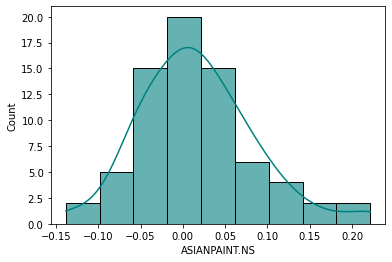

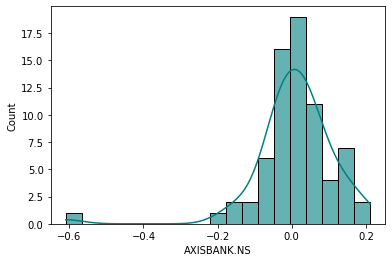

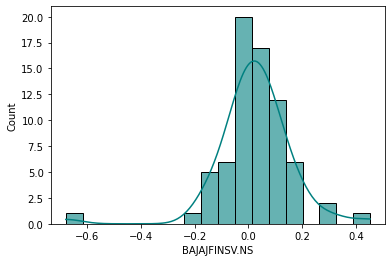

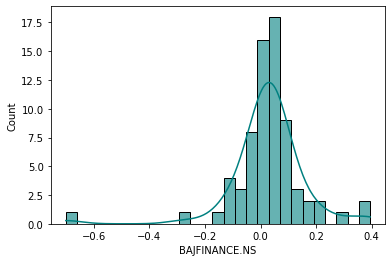

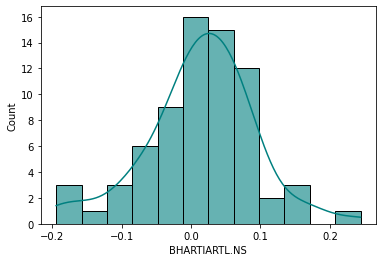

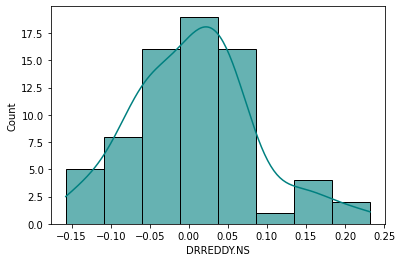

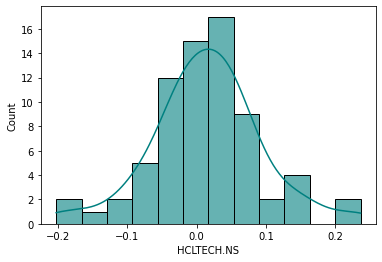

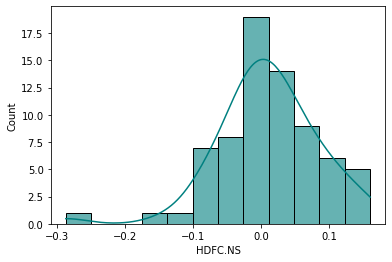

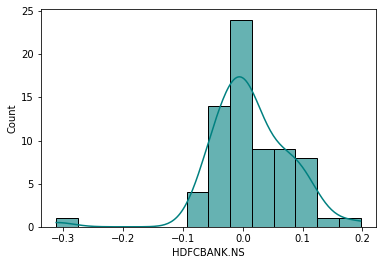

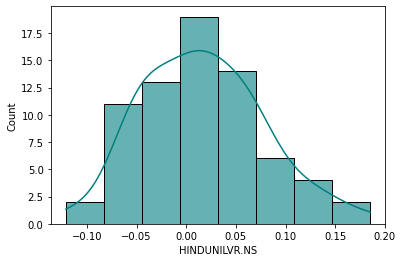

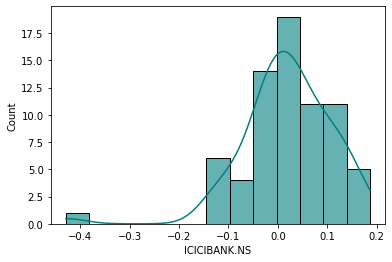

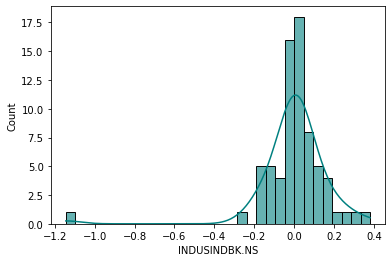

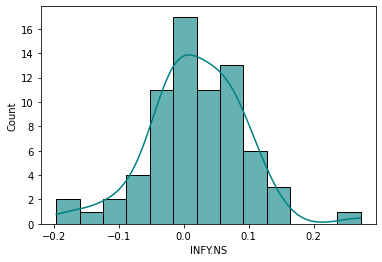

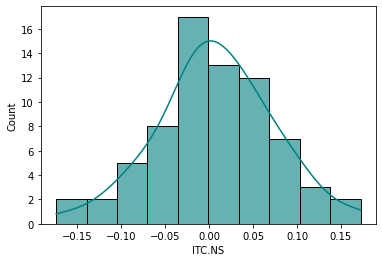

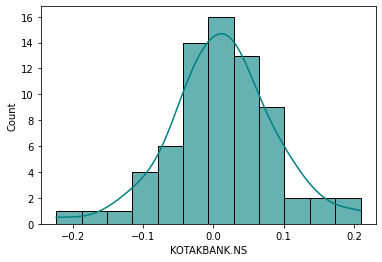

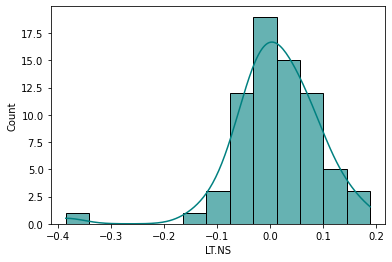

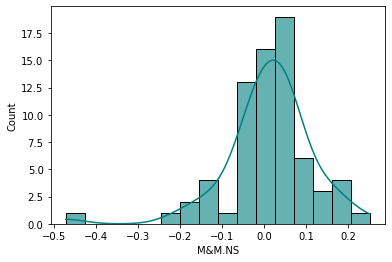

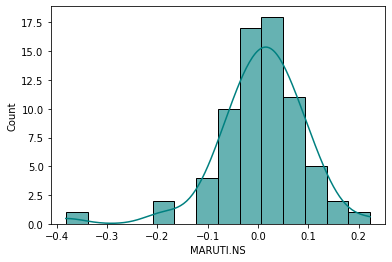

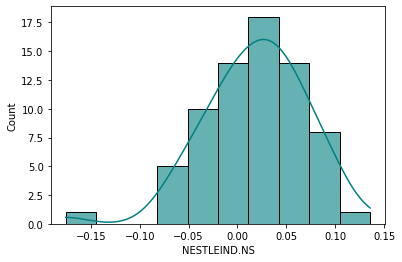

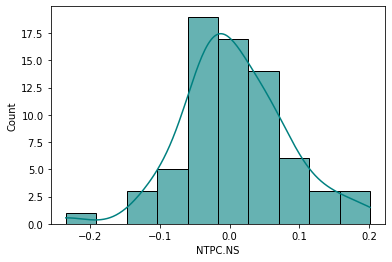

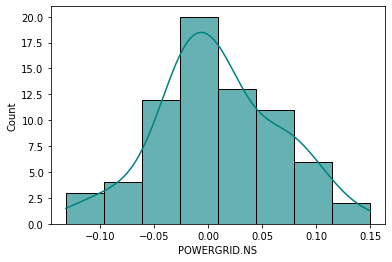

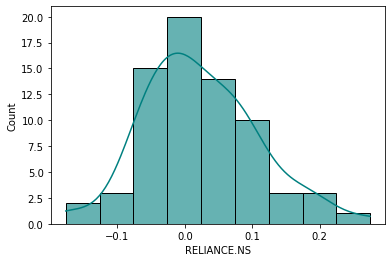

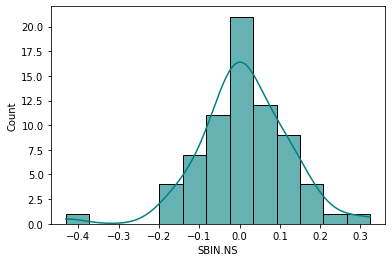

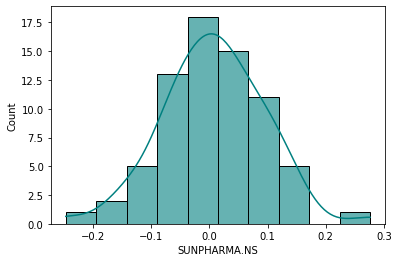

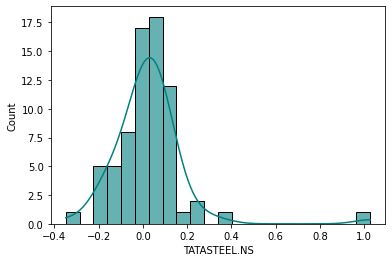

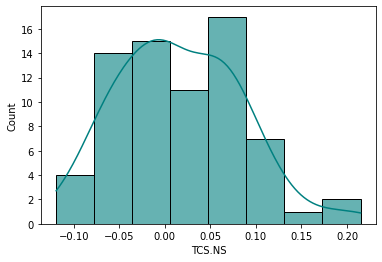

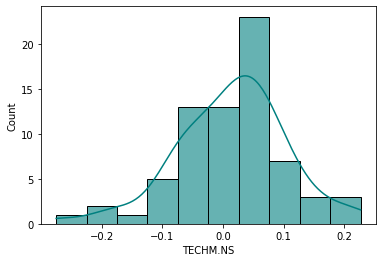

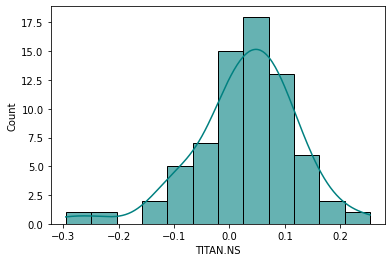

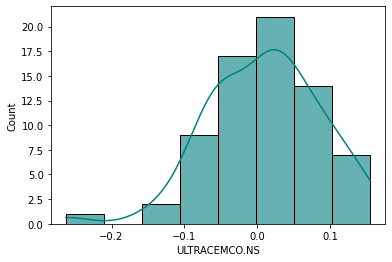

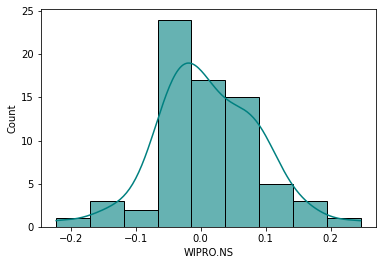

In [19]:
cat_columns = df1.select_dtypes(include='object').columns
num_columns = df1.select_dtypes(exclude='object').columns
for var in num_columns: 
    plt.figure()
    sns.histplot(data = df1, x = var, kde = True, color='teal', alpha=0.6)

<Figure size 1080x576 with 0 Axes>

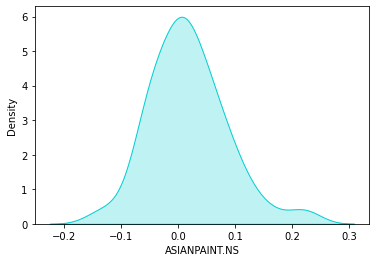

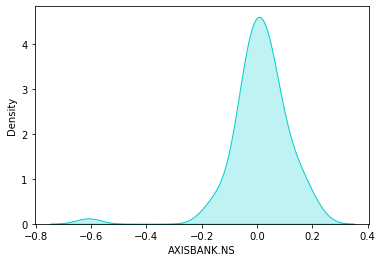

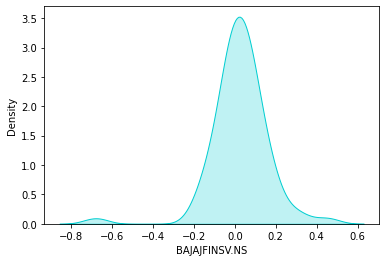

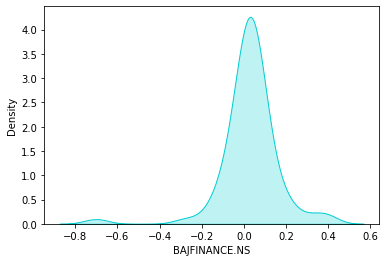

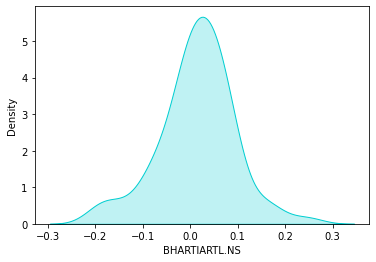

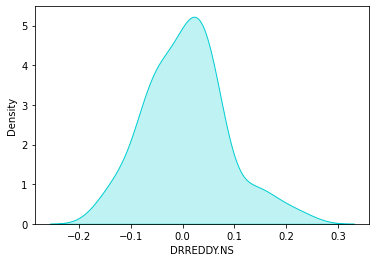

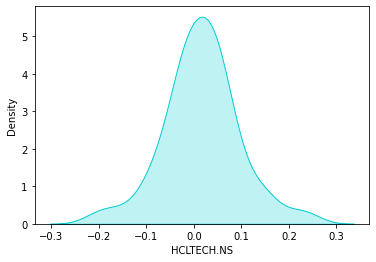

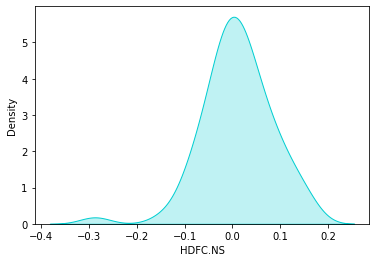

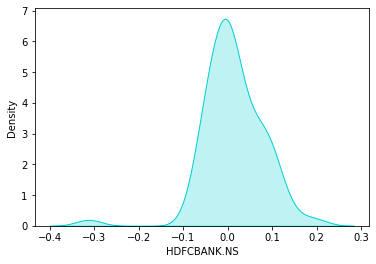

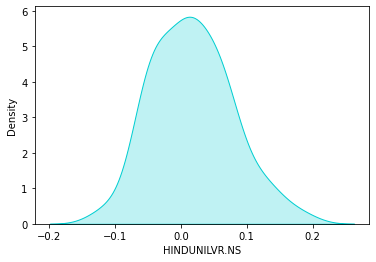

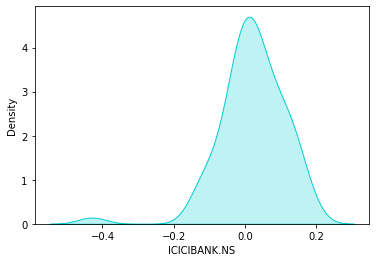

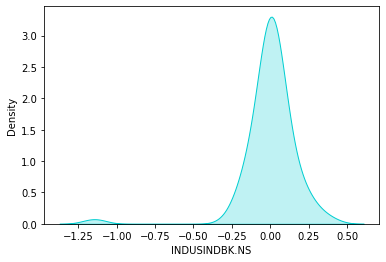

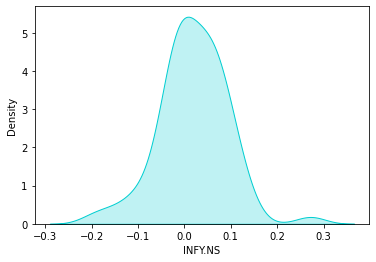

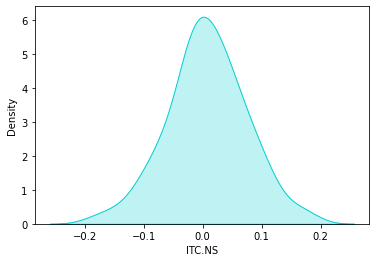

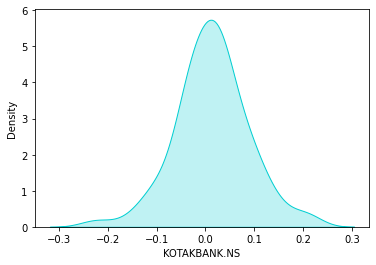

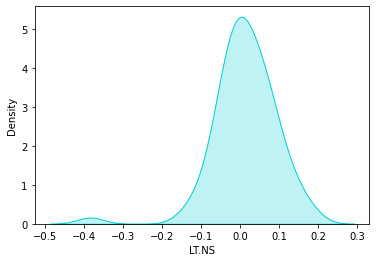

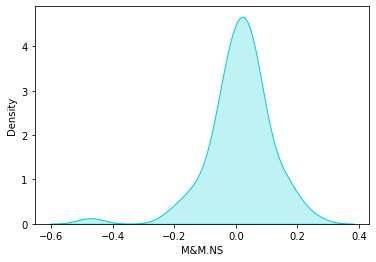

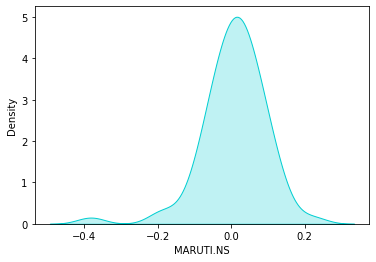

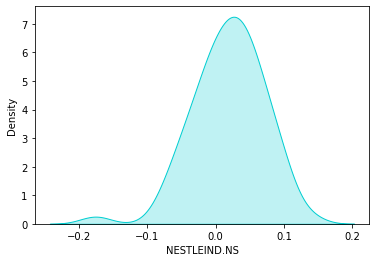

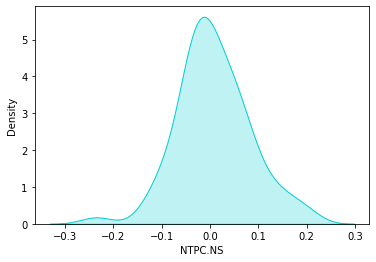

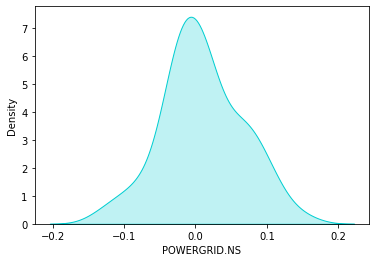

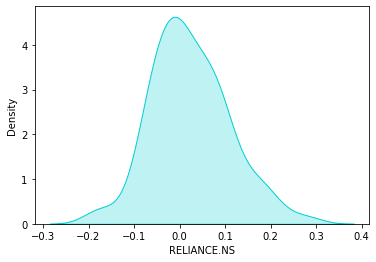

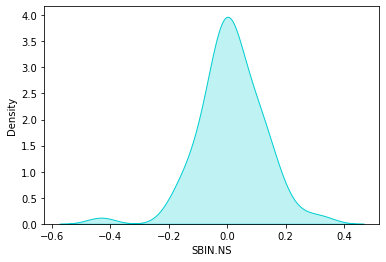

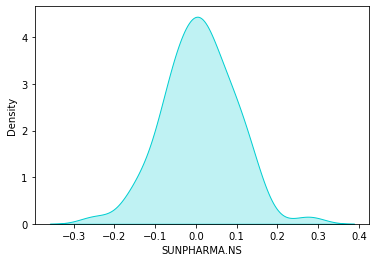

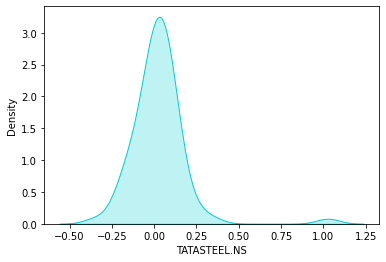

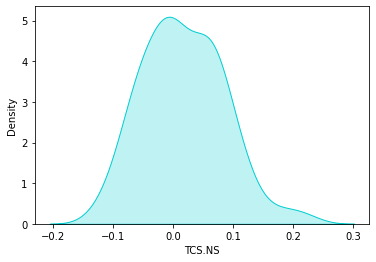

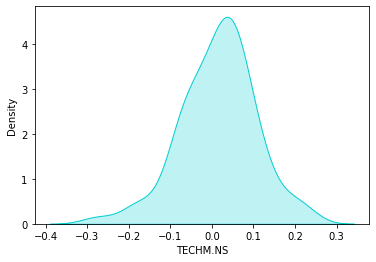

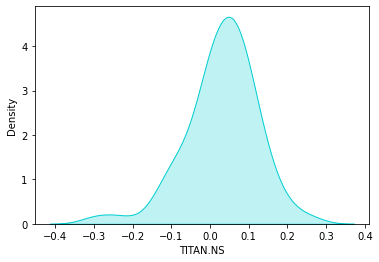

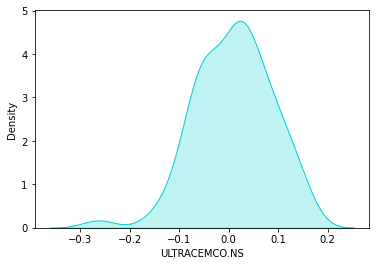

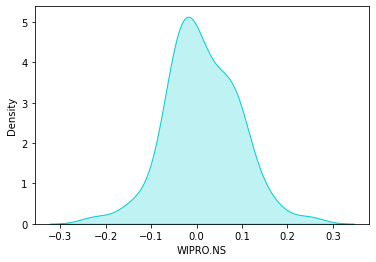

In [20]:
plt.figure(figsize=(15,8))
for var in num_columns: 
    plt.figure()
    sns.kdeplot(data = df1, x = var,  color='darkturquoise', shade=True)

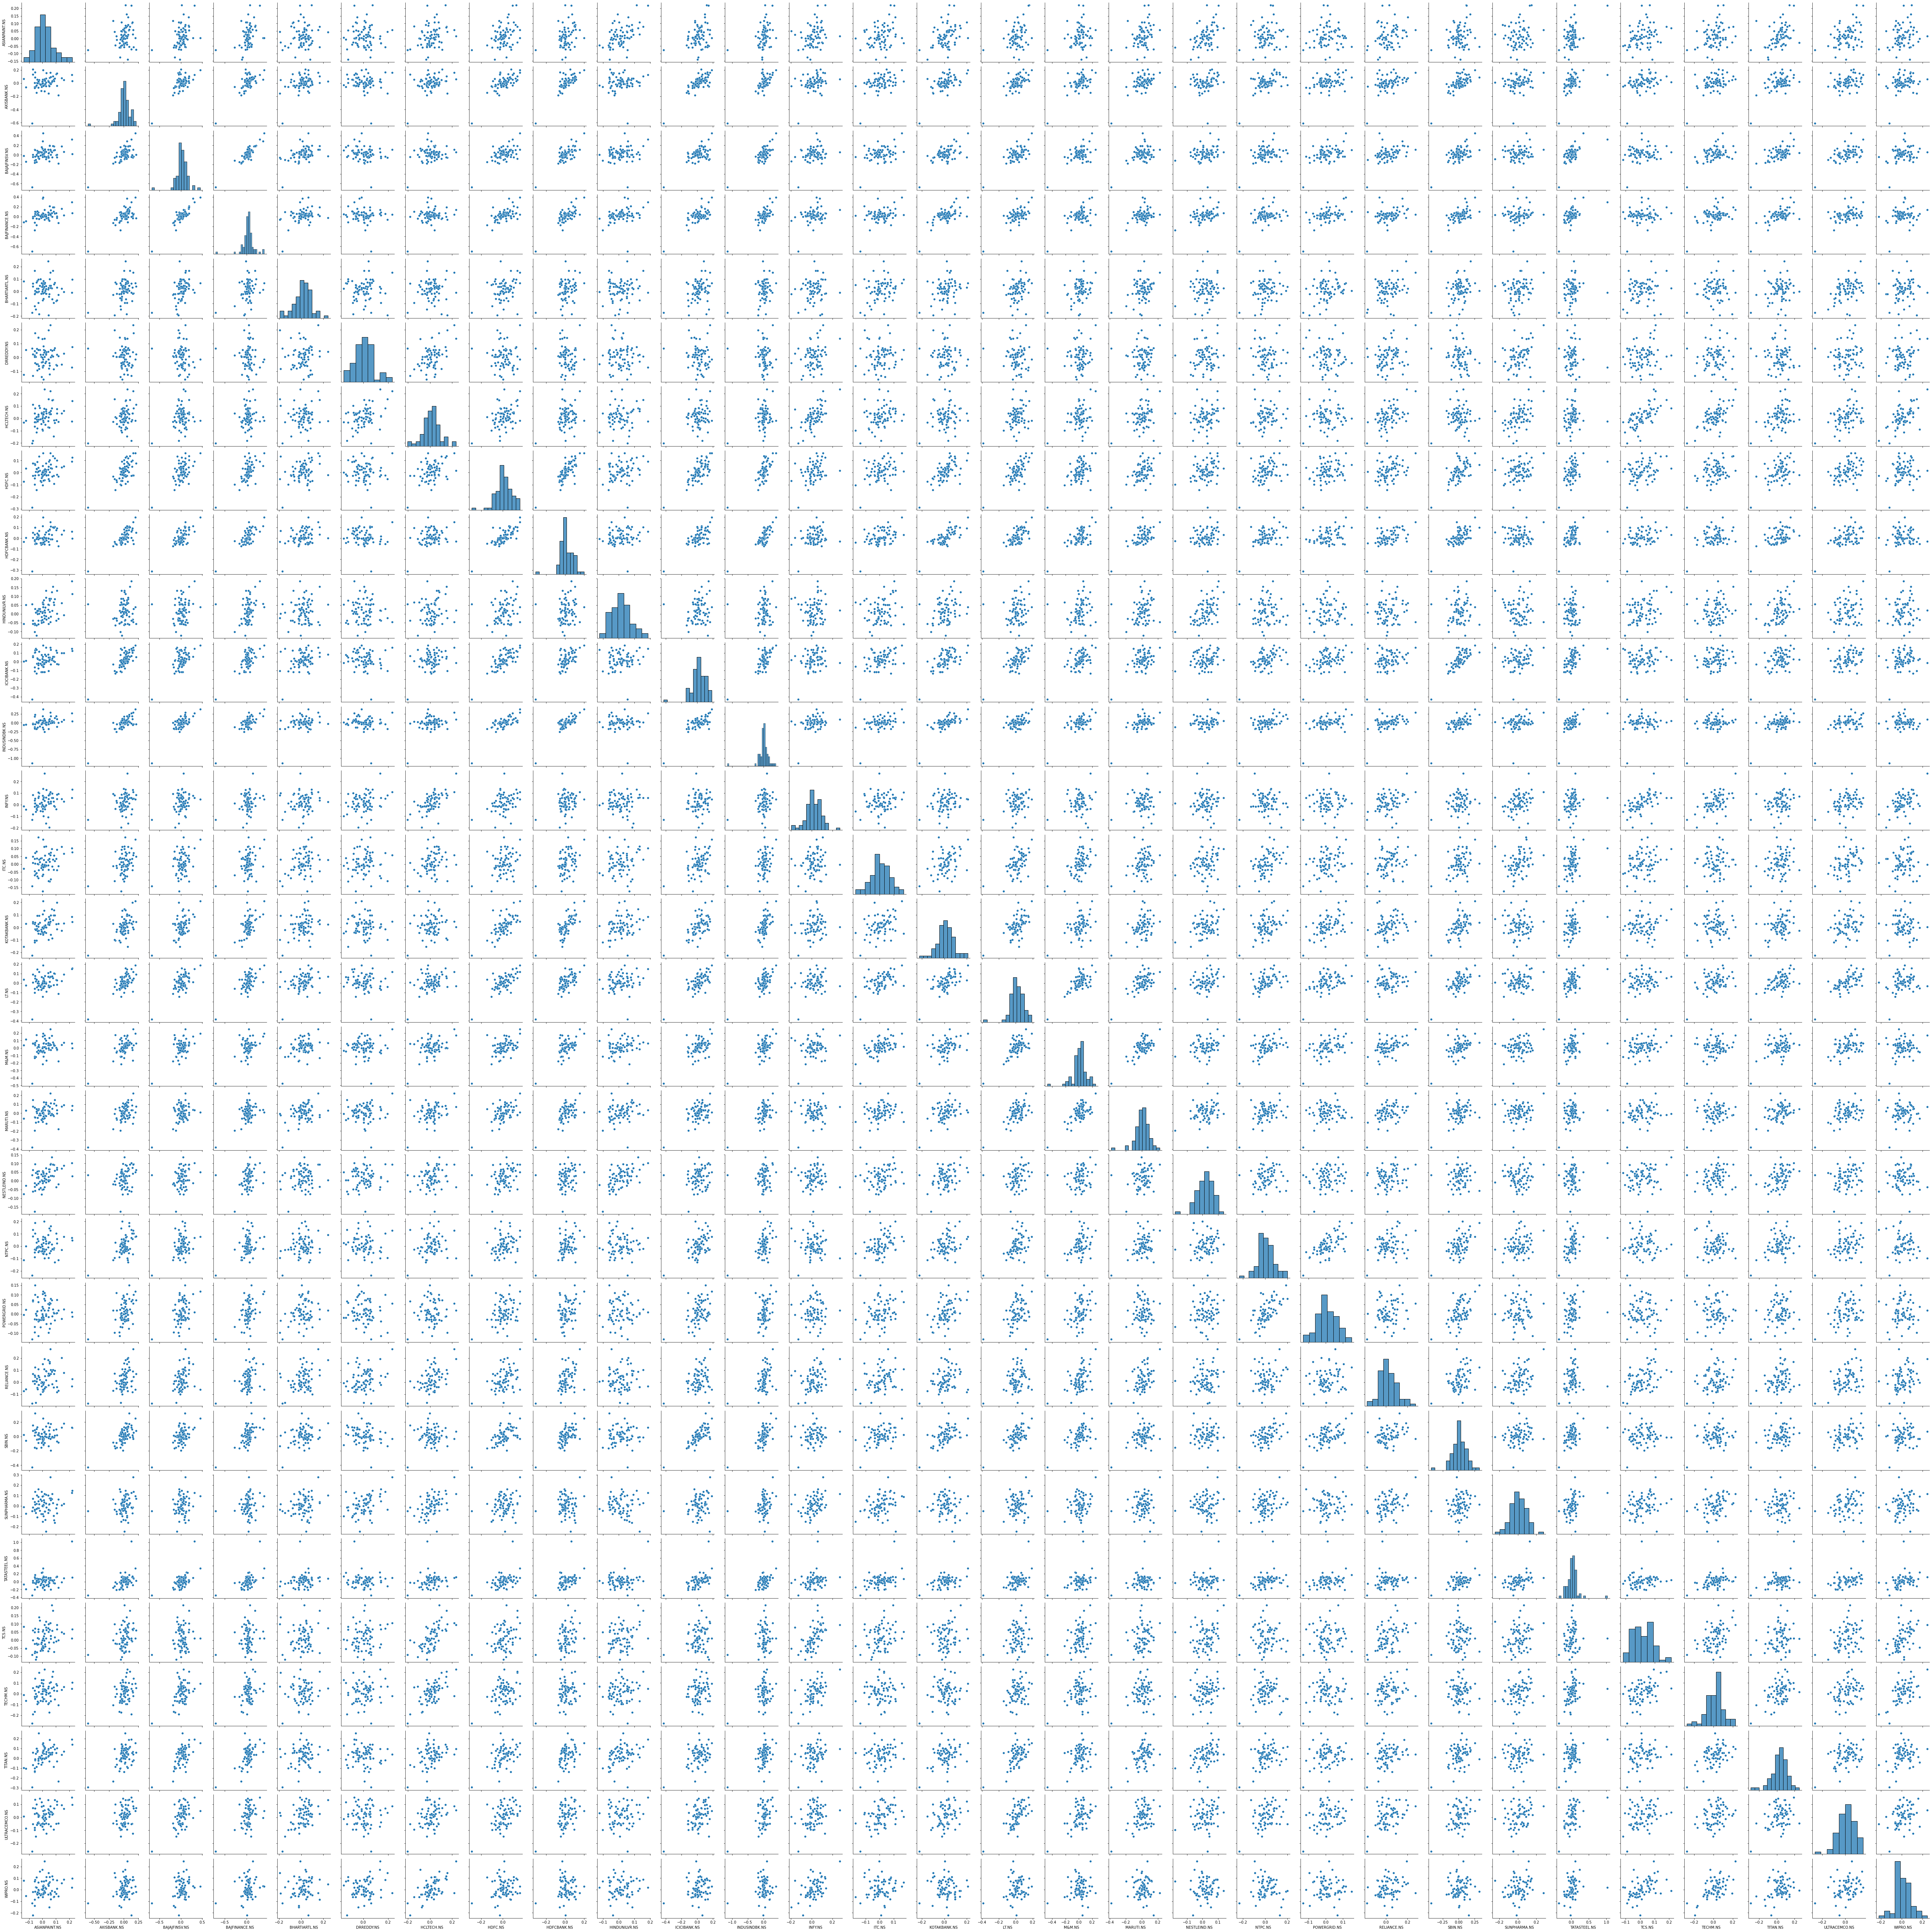

In [21]:
sns.pairplot(df1)

In [22]:
for var in num_columns: 
    for i in cat_columns:
        plt.figure()
        sns.catplot(x=i,y=var,data=df1,kind='box',palette='Dark2')   

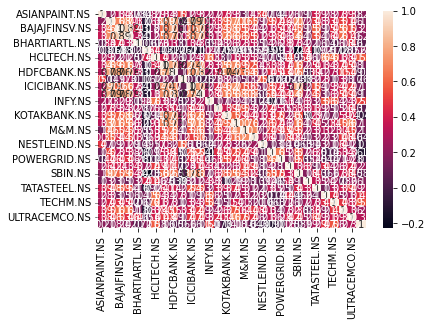

In [23]:
sns.heatmap(df1.corr(), annot=True)

## Scikit-Learn

In [96]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, OneHotEncoder

In [97]:
X = df2


In [98]:
categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns

In [99]:
X = pd.get_dummies(data = X, prefix = categorical_columns, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
X

Date           2019-11-01  2019-12-01  2020-01-01  2020-02-01  2020-03-01  \
ASIANPAINT.NS      -0.057       0.045   5.977e-03       0.001      -0.076   
AXISBANK.NS         0.004       0.020  -3.344e-02      -0.045      -0.610   
BAJAJFINSV.NS       0.113       0.031   5.102e-03      -0.042      -0.679   
BAJFINANCE.NS       0.012       0.039   3.050e-02       0.023      -0.701   
BHARTIARTL.NS       0.167       0.030   8.543e-02       0.053      -0.172   
DRREDDY.NS          0.046      -0.014   8.017e-02      -0.062       0.064   
HCLTECH.NS         -0.029       0.008   4.020e-02      -0.098      -0.202   
HDFC.NS             0.075       0.049   6.008e-04      -0.104      -0.287   
HDFCBANK.NS         0.036      -0.002  -3.667e-02      -0.040      -0.312   
HINDUNILVR.NS      -0.061      -0.057   5.624e-02       0.067       0.055   
ICICIBANK.NS        0.102       0.050  -2.489e-02      -0.056      -0.429   
INDUSINDBK.NS       0.178      -0.038  -1.819e-01      -0.131      -1.145   
INFY.NS             0.039       0.049   5.947e-02      -0.059      -0.132   
ITC.NS             -0.045      -0.036  -1.079e-02      -0.174      -0.140   
KOTAKBANK.NS        0.026       0.042   4.384e-03      -0.043      -0.223   
LT.NS              -0.102      -0.025   5.332e-02      -0.142      -0.384   
M&M.NS             -0.134       0.002   6.483e-02      -0.216      -0.472   
MARUTI.NS          -0.042       0.017  -6.375e-02      -0.096      -0.382   
NESTLEIND.NS       -0.034       0.023   4.197e-02       0.027       0.033   
NTPC.NS            -0.051       0.023  -5.348e-02      -0.057      -0.235   
POWERGRID.NS       -0.026      -0.016  -1.803e-02      -0.029      -0.132   
RELIANCE.NS         0.058      -0.024  -7.003e-02      -0.061      -0.176   
SBIN.NS             0.090      -0.024  -4.693e-02      -0.050      -0.431   
SUNPHARMA.NS        0.037      -0.039   4.038e-03      -0.152      -0.050   
TATASTEEL.NS        0.116       0.099  -7.327e-02      -0.139      -0.348   
TCS.NS             -0.080       0.051  -3.898e-02      -0.036      -0.091   
TECHM.NS            0.030       0.001   4.401e-02      -0.068      -0.275   
TITAN.NS           -0.138       0.024  -1.683e-04       0.055      -0.295   
ULTRACEMCO.NS       0.028      -0.051   8.752e-02      -0.046      -0.263   
WIPRO.NS           -0.087       0.034  -3.730e-02      -0.063      -0.119   

Date           2020-04-01  2020-05-01  2020-06-01  2020-07-01  2020-08-01  \
ASIANPAINT.NS       0.058      -0.044       0.003       0.016       0.103   
AXISBANK.NS         0.160      -0.145       0.055       0.060       0.140   
BAJAJFINSV.NS       0.107      -0.147       0.283       0.060      -0.003   
BAJFINANCE.NS       0.047      -0.171       0.371       0.138       0.070   
BHARTIARTL.NS       0.154       0.072       0.013      -0.009      -0.078   
DRREDDY.NS          0.232       0.034      -0.032       0.136      -0.052   
HCLTECH.NS          0.220       0.012       0.012       0.236      -0.012   
HDFC.NS             0.160      -0.144       0.056       0.015       0.050   
HDFCBANK.NS         0.150      -0.051       0.113      -0.031       0.077   
HINDUNILVR.NS      -0.046      -0.065       0.058       0.020      -0.039   
ICICIBANK.NS        0.161      -0.136       0.057      -0.013       0.129   
INDUSINDBK.NS       0.287      -0.173       0.187       0.098       0.185   
INFY.NS             0.109      -0.035       0.077       0.272      -0.039   
ITC.NS              0.059       0.081      -0.014      -0.003       0.034   
KOTAKBANK.NS        0.046      -0.103       0.106       0.004       0.026   
LT.NS               0.118       0.038       0.012      -0.033       0.034   
M&M.NS              0.252       0.174       0.157       0.172       0.005   
MARUTI.NS           0.223       0.046       0.040       0.070       0.088   
NESTLEIND.NS        0.095      -0.022      -0.014      -0.035      -0.035   
NTPC.NS             0.128       0.029      -0.021      -0.096       0.10

In [100]:
col_names = X.columns

In [101]:
# You can perform Box Cox or Yeo-Johnson (Non Normal transformation)
#bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train)
#X_train = pd.DataFrame(bctrans.transform(X_train),columns = col_names)
#X_test = pd.DataFrame(bctrans.transform(X_test),columns = col_names)
scaler = preprocessing.StandardScaler().fit(X)
scaled_X = pd.DataFrame(scaler.transform(X),columns = col_names)
scaled_X.head()

Date  2019-11-01  2019-12-01  2020-01-01  2020-02-01  2020-03-01  2020-04-01  \
0         -0.814       0.960       0.118       0.916       0.842      -0.658   
1         -0.066       0.272      -0.563       0.220      -1.288       0.444   
2          1.287       0.559       0.103       0.260      -1.563      -0.135   
3          0.031       0.781       0.542       1.238      -1.652      -0.771   
4          1.955       0.535       1.492       1.697       0.460       0.376   

Date  2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  \
0         -0.171      -0.782      -0.654       1.015       0.648       0.913   
1         -1.286      -0.190      -0.187       1.585      -1.369       1.513   
2         -1.315       2.396      -0.185      -0.565      -0.363      -1.376   
3         -1.577       3.394       0.664       0.529      -0.420      -0.525   
4          1.110      -0.664      -0.929      -1.703      -1.745      -0.221   

Date  2020-11-01  2020-12-01  2021-01-01  2021-02-01  2021-03-01  2021-04-01  \
0         -1.027       2.558      -1.655      -1.185       1.361      -0.070   
1          0.502      -0.988       1.499       0.338      -0.959       0.250   
2          2.458      -1.251       0.157       0.460      -0.318       1.631   
3          2.010      -0.152      -1.247       0.516      -0.700       0.663   
4         -0.541       0.216       1.752      -0.550      -1.501       0.406   

Date  2021-05-01  2021-06-01  2021-07-01  2021-08-01  2021-09-01  2021-10-01  \
0          2.410      -0.256      -0.348      -0.042      -0.292      -0.796   
1         -0.413      -0.444      -0.968       0.336      -0.889      -0.578   
2          0.045       0.201       1.834       1.601       0.061      -0.002   
3         -0.846       1.136       0.189       1.651      -0.208      -0.628   
4         -1.738      -0.766       0.601       1.299       0.051      -0.106   

Date  2021-11-01  2021-12-01  2022-01-01  2022-02-01  2022-03-01  2022-04-01  \
0          0.694       0.761      -0.639       0.651      -1.121       0.806   
1         -1.229       0.093       1.528      -0.300      -0.115      -0.348   
2          0.023      -1.341      -0.359       0.917       0.585      -1.471   
3         -0.291      -0.544       0.158       0.515       0.089      -0.852   
4          1.325      -1.574       0.817      -0.700       1.161      -0.072   

Date  2022-05-01  2022-06-01  2022-07-01  2022-08-01  2022-09-01  2022-10-01  
0         -1.419       0.037       0.454      -0.476       0.130      -2.271  
1         -0.447      -0.178      -0.012       0.006      -0.087       3.043  
2         -1.702      -1.628       0.985       1.926       0.217      -0.809  
3         -0.930      -0.874       0.842      -0.565       0.533      -1.405  
4         -0.331       0.605      -0.744       0.744       2.617      -0.175

In [102]:
scaled_X.index = X.index
scaled_X.head()

Date           2019-11-01  2019-12-01  2020-01-01  2020-02-01  2020-03-01  \
ASIANPAINT.NS      -0.814       0.960       0.118       0.916       0.842   
AXISBANK.NS        -0.066       0.272      -0.563       0.220      -1.288   
BAJAJFINSV.NS       1.287       0.559       0.103       0.260      -1.563   
BAJFINANCE.NS       0.031       0.781       0.542       1.238      -1.652   
BHARTIARTL.NS       1.955       0.535       1.492       1.697       0.460   

Date           2020-04-01  2020-05-01  2020-06-01  2020-07-01  2020-08-01  \
ASIANPAINT.NS      -0.658      -0.171      -0.782      -0.654       1.015   
AXISBANK.NS         0.444      -1.286      -0.190      -0.187       1.585   
BAJAJFINSV.NS      -0.135      -1.315       2.396      -0.185      -0.565   
BAJFINANCE.NS      -0.771      -1.577       3.394       0.664       0.529   
BHARTIARTL.NS       0.376       1.110      -0.664      -0.929      -1.703   

Date           2020-09-01  2020-10-01  2020-11-01  2020-12-01  2021-01-01  \
ASIANPAINT.NS       0.648       0.913      -1.027       2.558      -1.655   
AXISBANK.NS        -1.369       1.513       0.502      -0.988       1.499   
BAJAJFINSV.NS      -0.363      -1.376       2.458      -1.251       0.157   
BAJFINANCE.NS      -0.420      -0.525       2.010      -0.152      -1.247   
BHARTIARTL.NS      -1.745      -0.221      -0.541       0.216       1.752   

Date           2021-02-01  2021-03-01  2021-04-01  2021-05-01  2021-06-01  \
ASIANPAINT.NS      -1.185       1.361      -0.070       2.410      -0.256   
AXISBANK.NS         0.338      -0.959       0.250      -0.413      -0.444   
BAJAJFINSV.NS       0.460      -0.318       1.631       0.045       0.201   
BAJFINANCE.NS       0.516      -0.700       0.663      -0.846       1.136   
BHARTIARTL.NS      -0.550      -1.501       0.406      -1.738      -0.766   

Date           2021-07-01  2021-08-01  2021-09-01  2021-10-01  2021-11-01  \
ASIANPAINT.NS      -0.348      -0.042      -0.292      -0.796       0.694   
AXISBANK.NS        -0.968       0.336      -0.889      -0.578      -1.229   
BAJAJFINSV.NS       1.834       1.601       0.061      -0.002       0.023   
BAJFINANCE.NS       0.189       1.651      -0.208      -0.628      -0.291   
BHARTIARTL.NS       0.601       1.299       0.051      -0.106       1.325   

Date           2021-12-01  2022-01-01  2022-02-01  2022-03-01  2022-04-01  \
ASIANPAINT.NS       0.761      -0.639       0.651      -1.121       0.806   
AXISBANK.NS         0.093       1.528      -0.300      -0.115      -0.348   
BAJAJFINSV.NS      -1.341      -0.359       0.917       0.585      -1.471   
BAJFINANCE.NS      -0.544       0.158       0.515       0.089      -0.852   
BHARTIARTL.NS      -1.574       0.817      -0.700       1.161      -0.072   

Date           2022-05-01  2022-06-01  2022-07-01  2022-08-01  2022-09-01  \
ASIANPAINT.NS      -1.419       0.037       0.454      -0.476       0.130   
AXISBANK.NS        -0.447      -0.178      -0.012       0.006      -0.087   
BAJAJFINSV.NS      -1.702      -1.628       0.985       1.926       0.217   
BAJFINANCE.NS      -0.930      -0.874       0.842      -0.565       0.533   
BHARTIARTL.NS      -0.331       0.605      -0.744       0.744       2.617   

Date           2022-10-01  
ASIANPAINT.NS      -2.271  
AXISBANK.NS         3.043  
BAJAJFINSV.NS      -0.809  
BAJFINANCE.NS      -1.405  
BHARTIARTL.NS      -0.175

In [103]:
scaled_X.describe()

Date   2019-11-01  2019-12-01  2020-01-01  2020-02-01  2020-03-01  2020-04-01  \
count   3.000e+01      30.000      30.000   3.000e+01   3.000e+01   3.000e+01   
mean    7.401e-18       0.000       0.000  -2.336e-17   2.961e-16  -1.184e-16   
std     1.017e+00       1.017       1.017   1.017e+00   1.017e+00   1.017e+00   
min    -1.813e+00      -1.847      -3.130  -2.358e+00  -3.425e+00  -1.777e+00   
25%    -7.177e-01      -0.889      -0.627  -5.732e-01  -3.866e-01  -6.855e-01   
50%     1.177e-01       0.225       0.055   4.482e-02   1.514e-01  -1.207e-01   
75%     5.636e-01       0.745       0.767   3.322e-01   6.201e-01   4.462e-01   
max     2.086e+00       2.447       1.528   1.904e+00   1.401e+00   1.809e+00   

Date   2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  \
count   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   
mean   -7.401e-18   2.924e-16   5.921e-17  -2.220e-17   2.220e-17   2.591e-17   
std     1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   
min    -1.603e+00  -1.169e+00  -1.873e+00  -1.703e+00  -1.745e+00  -1.890e+00   
25%    -7.802e-01  -6.755e-01  -7.589e-01  -8.192e-01  -7.916e-01  -6.100e-01   
50%     3.974e-02  -1.824e-01  -1.293e-01  -7.890e-02  -1.555e-01   3.630e-04   
75%     6.754e-01   3.618e-01   5.891e-01   8.372e-01   8.075e-01   7.824e-01   
max     2.241e+00   3.394e+00   2.107e+00   2.255e+00   2.157e+00   2.256e+00   

Date   2020-11-01  2020-12-01  2021-01-01  2021-02-01  2021-03-01  2021-04-01  \
count   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   
mean   -3.701e-18  -3.331e-17  -3.701e-17   2.591e-17  -6.754e-17  -2.961e-17   
std     1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   
min    -1.538e+00  -1.809e+00  -1.876e+00  -1.341e+00  -2.054e+00  -1.203e+00   
25%    -7.375e-01  -7.566e-01  -6.708e-01  -7.528e-01  -6.782e-01  -7.019e-01   
50%    -2.289e-01   1.051e-01   1.358e-02  -5.203e-02  -2.273e-01  -3.896e-01   
75%     4.724e-01   6.983e-01   5.777e-01   5.239e-01   9.947e-01   3.877e-01   
max     2.458e+00   2.558e+00   1.763e+00   2.810e+00   1.728e+00   3.025e+00   

Date   2021-05-01  2021-06-01  2021-07-01  2021-08-01  2021-09-01  2021-10-01  \
count   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   
mean    6.291e-17  -6.615e-17   1.480e-17   2.091e-16   3.701e-18   3.331e-17   
std     1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   
min    -1.799e+00  -1.872e+00  -2.097e+00  -1.528e+00  -2.298e+00  -2.061e+00   
25%    -7.693e-01  -6.460e-01  -7.166e-01  -8.412e-01  -6.513e-01  -5.625e-01   
50%     4.304e-02  -1.134e-01  -1.368e-01  -5.969e-02  -2.133e-01  -5.396e-02   
75%     4.698e-01   7.358e-01   5.971e-01   7.555e-01   6.980e-01   4.709e-01   
max     2.975e+00   2.720e+00   2.719e+00   1.886e+00   2.583e+00   2.219e+00   

Date   2021-11-01  2021-12-01  2022-01-01  2022-02-01  2022-03-01  2022-04-01  \
count   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   
mean   -1.850e-18   3.701e-17  -1.480e-17  -1.191e-16  -1.369e-16   6.661e-17   
std     1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   
min    -3.055e+00  -2.007e+00  -2.276e+00  -1.759e+00  -2.298e+00  -2.228e+00   
25%    -3.039e-01  -6.828e-01  -5.148e-01  -5.977e-01  -6.015e-01  -5.290e-01   
50%     6.790e-02  -7.212e-02   4.767e-02  -2.303e-01   4.420e-04   8.546e-02   
75%     5.349e-01   5.220e-01   6.694e-01   4.743e-01   5.820e-01   7.166e-01   
max     2.020e+00   2.240e+00   1.806e+00   2.857e+00   2.568e+00   1.992e+00   

Date   2022-05-01  2022-06-01  2022-07-01  2022-08-01  2022-09-01  2022-10-01  
count   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01   3.000e+01  
mean   -9.252e-17  -2.665e-16   3.701e-17  -1.184e-16   1.554e-16   7.401e-17  
std     1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00   1.017e+00  
min    -2.376e+00  -2.065e+00 

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise

In [105]:
pd.set_option('display.max_columns', None)

In [106]:
d = pairwise.pairwise_distances(scaled_X, metric="euclidean")
d1 = pd.DataFrame(d, columns=scaled_X.index, index=scaled_X.index)
d1

ASIANPAINT.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
ASIANPAINT.NS          0.000    9.884e+00         10.392          9.038   
AXISBANK.NS            9.884    8.429e-08          8.745          8.186   
BAJAJFINSV.NS         10.392    8.745e+00          0.000          5.083   
BAJFINANCE.NS          9.038    8.186e+00          5.083          0.000   
BHARTIARTL.NS         10.265    8.672e+00          8.828          9.285   
DRREDDY.NS             8.738    1.005e+01         10.674         10.114   
HCLTECH.NS             7.673    8.909e+00         10.192          9.343   
HDFC.NS                7.552    5.764e+00          7.980          7.268   
HDFCBANK.NS            7.956    5.136e+00          7.548          6.937   
HINDUNILVR.NS          7.629    1.003e+01         10.579          8.731   
ICICIBANK.NS           8.055    5.922e+00          8.170          8.285   
INDUSINDBK.NS         11.990    9.100e+00          9.470          9.214   
INFY.NS                8.644    8.943e+00          9.721          8.463   
ITC.NS                 8.924    8.819e+00          9.941         10.124   
KOTAKBANK.NS           8.173    7.273e+00          8.589          7.798   
LT.NS                  7.485    6.808e+00          8.715          8.697   
M&M.NS                11.235    9.082e+00         10.714         10.731   
MARUTI.NS              7.737    7.250e+00         10.744          9.584   
NESTLEIND.NS           6.083    7.552e+00          9.267          8.671   
NTPC.NS                8.440    7.613e+00          9.946          9.497   
POWERGRID.NS           9.032    6.824e+00          8.260          8.119   
RELIANCE.NS            9.304    8.217e+00          8.827          8.833   
SBIN.NS                9.665    7.510e+00          9.580          9.148   
SUNPHARMA.NS           8.829    8.720e+00          9.633          9.372   
TATASTEEL.NS          10.744    1.075e+01          9.434         10.035   
TCS.NS                 7.622    7.537e+00          9.786          8.631   
TECHM.NS               8.191    8.958e+00          8.711          8.385   
TITAN.NS               6.759    9.023e+00          8.226          7.579   
ULTRACEMCO.NS          7.825    7.989e+00          9.408          9.335   
WIPRO.NS               8.129    9.767e+00          9.665          9.427   

               BHARTIARTL.NS  DRREDDY.NS  HCLTECH.NS  HDFC.NS  HDFCBANK.NS  \
ASIANPAINT.NS         10.265       8.738   7.673e+00    7.552        7.956   
AXISBANK.NS            8.672      10.048   8.909e+00    5.764        5.136   
BAJAJFINSV.NS          8.828      10.674   1.019e+01    7.980        7.548   
BAJFINANCE.NS          9.285      10.114   9.343e+00    7.268        6.937   
BHARTIARTL.NS          0.000       8.572   9.513e+00    7.681        7.527   
DRREDDY.NS             8.572       0.000   6.800e+00    7.706        7.579   
HCLTECH.NS             9.513       6.800   1.192e-07    7.461        7.688   
HDFC.NS                7.681       7.706   7.461e+00    0.000        3.847   
HDFCBANK.NS            7.527       7.579   7.688e+00    3.847        0.000   
HINDUNILVR.NS          8.839       7.654   8.146e+00    8.179        7.793   
ICICIBANK.NS           8.292       9.523   9.503e+00    4.476        5.317   
INDUSINDBK.NS         12.221      12.737   1.228e+01    9.713        8.707   
INFY.NS                9.254       7.298   5.465e+00    7.312        7.880   
ITC.NS                 8.018       7.735   8.075e+00    7.481        6.592   
KOTAKBANK.NS           8.523       8.816   9.236e+00    4.957        5.163   
LT.NS                  8.184       8.076   6.910e+00    5.602        5.629   
M&M.NS                 9.729       8.694   9.772e+00    8.033        7.324   
MARUTI.NS              9.528       7.574   7.755e+00    6.470        5.802   
NESTLEIND.NS           7.467       6.548   6.671e+00    5.467        4.902   
NTPC.NS                8.944       8.846   9.189e+00    7.105        6.108   
POWERGRID.NS           7.453       7.669   8.361e+0

In [123]:
model = KMeans(n_clusters=5)

In [124]:
cluster_labels = model.fit_predict(scaled_X)

In [125]:
cluster_labels

array([4, 2, 2, 2, 1, 4, 3, 2, 1, 4, 2, 2, 3, 1, 1, 4, 1, 4, 4, 1, 1, 1,
       2, 3, 0, 4, 3, 4, 4, 3], dtype=int32)

In [126]:
memb = pd.Series(model.labels_, index=scaled_X.index)

In [127]:
memb

ASIANPAINT.NS    4
AXISBANK.NS      2
BAJAJFINSV.NS    2
BAJFINANCE.NS    2
BHARTIARTL.NS    1
DRREDDY.NS       4
HCLTECH.NS       3
HDFC.NS          2
HDFCBANK.NS      1
HINDUNILVR.NS    4
ICICIBANK.NS     2
INDUSINDBK.NS    2
INFY.NS          3
ITC.NS           1
KOTAKBANK.NS     1
LT.NS            4
M&M.NS           1
MARUTI.NS        4
NESTLEIND.NS     4
NTPC.NS          1
POWERGRID.NS     1
RELIANCE.NS      1
SBIN.NS          2
SUNPHARMA.NS     3
TATASTEEL.NS     0
TCS.NS           4
TECHM.NS         3
TITAN.NS         4
ULTRACEMCO.NS    4
WIPRO.NS         3
dtype: int32

In [128]:
len(cluster_labels)

30

In [129]:
X['Cluster'] = cluster_labels

In [130]:
centroids = pd.DataFrame(model.cluster_centers_,columns=scaled_X.columns)
pd.set_option("precision", 3)
centroids


Date  2019-11-01  2019-12-01  2020-01-01  2020-02-01  2020-03-01  2020-04-01  \
0          1.325       2.447      -1.252      -1.200      -0.243      -0.193   
1         -0.063      -0.221      -0.059      -0.173       0.216       0.223   
2          0.899       0.212      -0.605       0.024      -1.296       0.085   
3         -0.136       0.001       0.397      -0.430       0.525      -0.088   
4         -0.715      -0.241       0.442       0.507       0.551      -0.194   

Date  2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  \
0          0.200       0.338       0.404       1.277      -0.925       1.276   
1          0.566       0.053      -0.496      -0.188      -0.493      -0.094   
2         -1.396       0.987      -0.170       0.921      -0.866       0.252   
3          0.486      -0.490       1.541      -0.578       1.023      -0.284   
4          0.290      -0.580      -0.328      -0.370       0.646      -0.096   

Date  2020-11-01  2020-12-01  2021-01-01  2021-02-01  2021-03-01  2021-04-01  \
0          1.595       0.460      -0.579       1.228       1.655       3.025   
1         -0.122      -0.922      -0.060       0.293      -0.444      -0.317   
2          1.199      -0.146       0.111       0.934      -0.978       0.232   
3         -0.672       0.748       0.504      -0.678       0.486       0.275   
4         -0.628       0.466      -0.249      -0.747       0.701      -0.388   

Date  2021-05-01  2021-06-01  2021-07-01  2021-08-01  2021-09-01  2021-10-01  \
0          0.500       0.437       2.719      -1.069      -2.298       0.313   
1         -0.325      -0.749      -0.347      -0.206       0.827       0.019   
2          0.384      -0.343       0.128       0.216      -0.130       0.513   
3         -0.322       0.845       0.698       0.357      -0.390      -0.227   
4          0.114       0.414      -0.481      -0.065      -0.162      -0.324   

Date  2021-11-01  2021-12-01  2022-01-01  2022-02-01  2022-03-01  2022-04-01  \
0         -2.365       0.136      -0.132       2.857       0.677      -0.155   
1          0.343      -0.972       0.629      -0.354       0.527       0.748   
2         -0.966      -0.519       0.531      -0.056      -0.165      -0.275   
3          0.520       1.680      -1.371       0.335       0.708      -1.247   
4          0.420       0.319      -0.195      -0.145      -0.809       0.259   

Date  2022-05-01  2022-06-01  2022-07-01  2022-08-01  2022-09-01  2022-10-01  
0         -2.376      -2.065       4.686      -0.727      -1.428      -0.492  
1          0.700       0.457      -0.463       0.686      -0.009       0.184  
2         -0.287      -0.409       0.341       0.275       0.302       0.055  
3         -0.289      -0.356      -0.454      -1.229      -0.033       0.200  
4          0.026       0.339      -0.122      -0.061      -0.050      -0.263

In [131]:
# calculate the distances of each data point to the cluster centers
distances = model.transform(scaled_X)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({"squaredDistance": minSquaredDistances,"cluster": model.labels_},index=scaled_X.index)
# group by cluster and print information
for cluster, data in df.groupby("cluster"):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print("Cluster" + str(cluster) + "(" + str(count) + "members)" + ":" + str(round(withinClustSS,3)) + " within cluster distance")

Cluster0(1members):0.0 within cluster distance
Cluster1(8members):189.784 within cluster distance
Cluster2(7members):191.758 within cluster distance
Cluster3(5members):91.568 within cluster distance
Cluster4(9members):211.409 within cluster distance


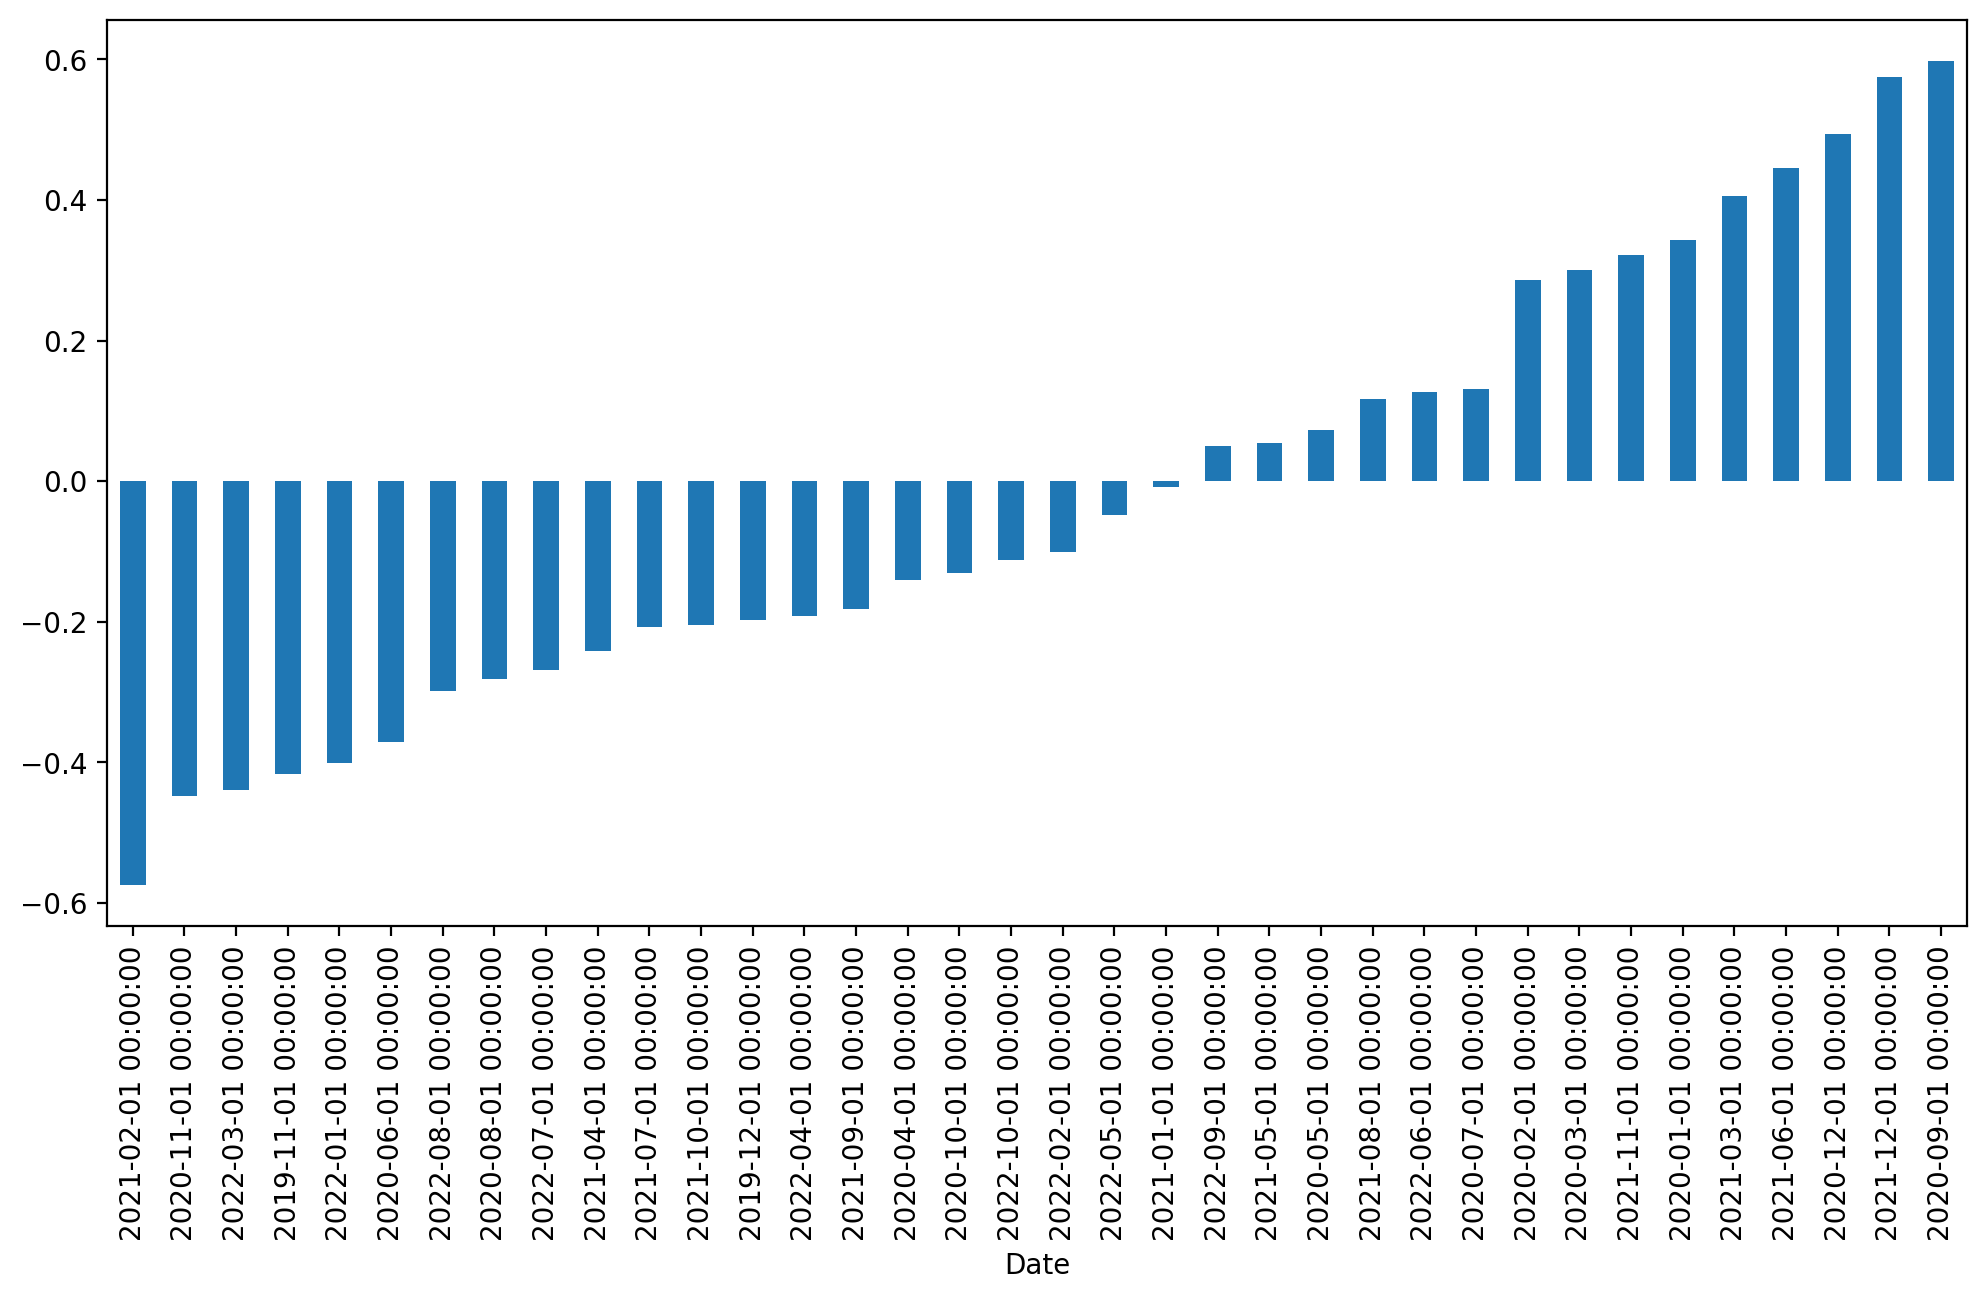

In [132]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [135]:
ssd = []

for k in range(2,20):    
    model = KMeans(n_clusters=k)    
    model.fit(scaled_X)    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

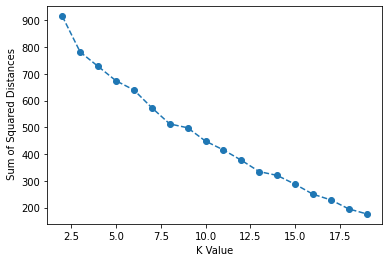

In [136]:
plt.plot(range(2,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [137]:
ssd

[915.1732541576687,
 781.3733920112154,
 727.6915726490139,
 673.9339381116048,
 639.6289812684274,
 573.1874069347233,
 512.7067196476332,
 498.2689605607299,
 448.37150083040626,
 415.46076267605076,
 376.92679289698594,
 334.4716188392566,
 320.30355384765846,
 287.28586713109536,
 250.06305572767172,
 228.59143495752312,
 195.0299161121417,
 176.31128753769076]

In [139]:
pd.Series(ssd).pct_change()

0       NaN
1    -0.146
2    -0.069
3    -0.074
4    -0.051
5    -0.104
6    -0.106
7    -0.028
8    -0.100
9    -0.073
10   -0.093
11   -0.113
12   -0.042
13   -0.103
14   -0.130
15   -0.086
16   -0.147
17   -0.096
dtype: float64

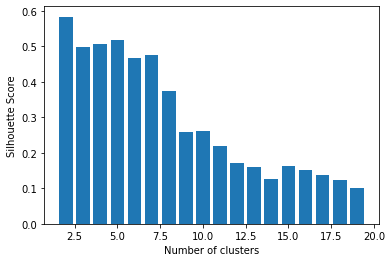

In [140]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 20):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = range(2, 20) 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [141]:
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(scaled_X)
cluster_labels

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [142]:
X['Cluster'] = cluster_labels


In [147]:
#cat_columns = df1.select_dtypes(include='object').columns
num_columns = X.select_dtypes(exclude='object').columns
for var in num_columns: 
    
    print(X[["Cluster", var]].groupby("Cluster", as_index=False).mean())

ValueError: ignored

In [59]:
from sklearn.decomposition import PCA
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)

P1     P2
0 -0.099 -0.294
1 -0.360  0.184

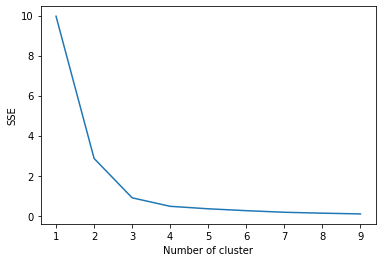

In [60]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

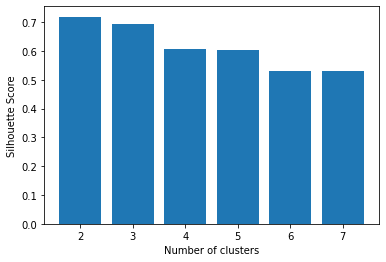

In [61]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 


In [62]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_principal)

KMeans(n_clusters=2)

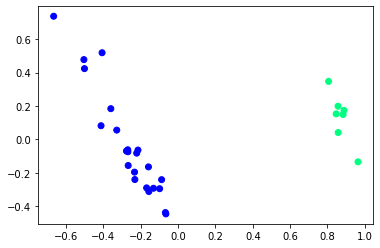

In [63]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## Hierarchical clustering

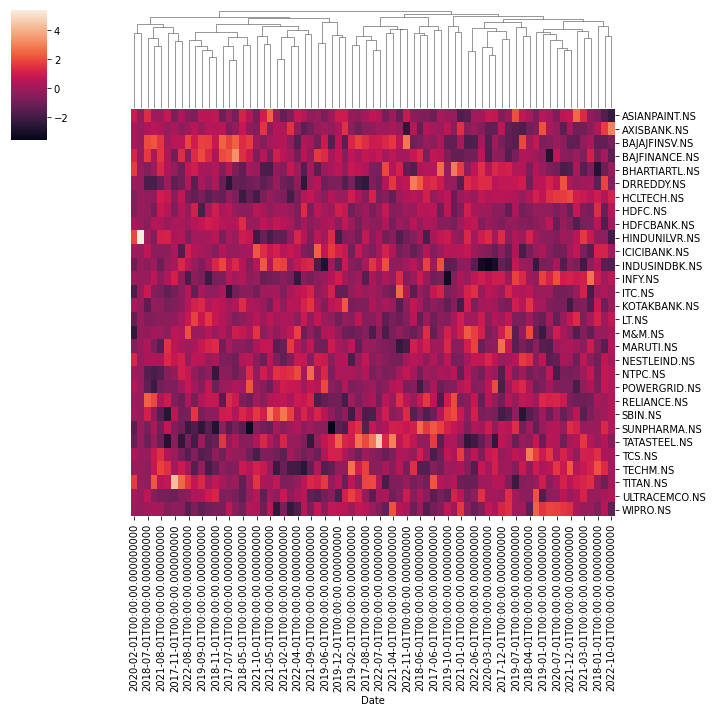

In [64]:
scaled_X1 = scaled_X
sns.clustermap(scaled_X1,row_cluster=False)

<Figure size 1080x576 with 0 Axes>

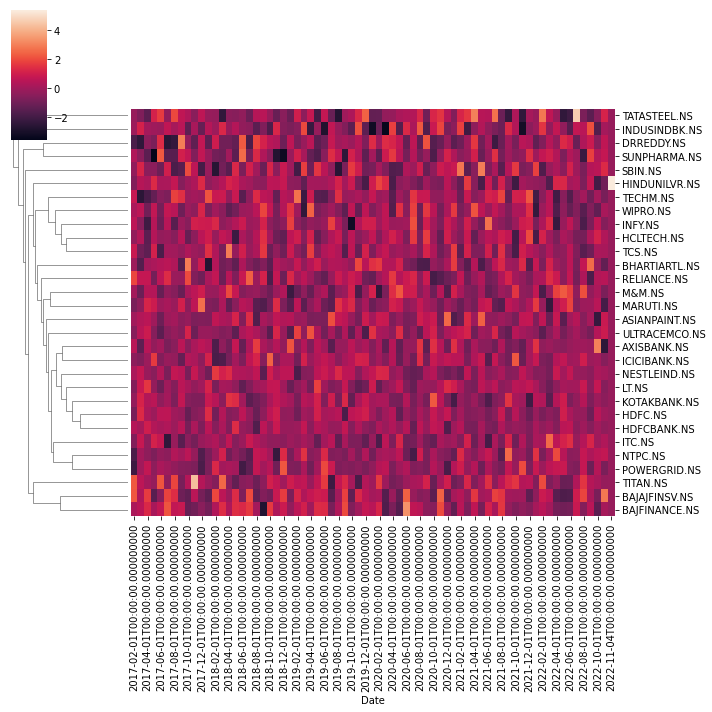

In [65]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_X1,col_cluster=False)

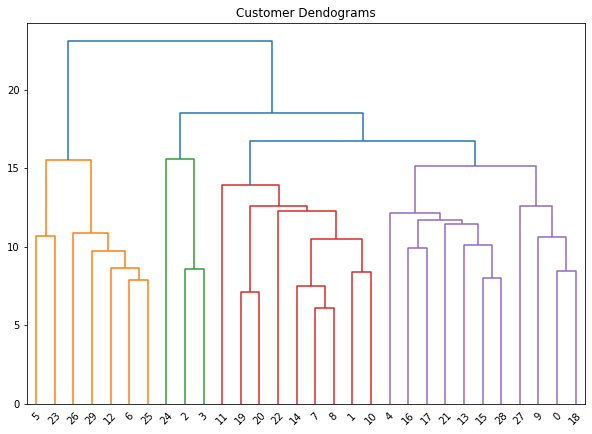

In [66]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_X1, method='ward'))

In [67]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled_X1)
len(cluster.labels_)

30

In [68]:
# 3 clusters
cluster_labels = shc.cut_tree(shc.linkage(scaled_X1, method='ward'), n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 0, 0, 2])

In [69]:
X['Cluster_Labels'] = cluster_labels


In [70]:
#cat_columns = df1.select_dtypes(include='object').columns
num_columns = X.select_dtypes(exclude='object').columns
for var in num_columns: 
    
    print(X[["Cluster_Labels", var]].groupby("Cluster_Labels", as_index=False).mean())

Date  Cluster_Labels  2017-02-01 00:00:00
0                  0                0.041
1                  1                0.098
2                  2                0.058
Date  Cluster_Labels  2017-03-01 00:00:00
0                  0                0.042
1                  1                0.034
2                  2               -0.007
Date  Cluster_Labels  2017-04-01 00:00:00
0                  0                0.033
1                  1                0.041
2                  2               -0.067
Date  Cluster_Labels  2017-05-01 00:00:00
0                  0                0.037
1                  1                0.023
2                  2               -0.004
Date  Cluster_Labels  2017-06-01 00:00:00
0                  0           -9.575e-05
1                  1            3.158e-02
2                  2           -2.480e-03
Date  Cluster_Labels  2017-07-01 00:00:00
0                  0                0.057
1                  1                0.149
2                  2              

ValueError: ignored

## PCA Manual

In [ ]:
# Grab Covariance Matrix
covariance_matrix = np.cov(scaled_X, rowvar=False)
covariance_matrix

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(covariance_matrix,annot = True)

In [ ]:
# Get Eigen Vectors and Eigen Values
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(eigen_values)
print(eigen_vectors)

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(eigen_vectors,annot = True)

In [ ]:
# Choose som number of components
num_components=2

In [ ]:
# Get index sorting key based on Eigen Values
sorted_key = np.argsort(eigen_values)[::-1][:num_components]
sorted_key

In [ ]:
# Get num_components of Eigen Values and Eigen Vectors
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]
print(eigen_values)
print(eigen_vectors)

In [ ]:
# Dot product of original data and eigen_vectors are the principal component values
# This is the "projection" step of the original points on to the Principal Component
principal_components=np.dot(scaled_X,eigen_vectors)

In [ ]:
principal_components

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Using Sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaled_X.shape

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit_transform(scaled_X)

In [ ]:
pca.explained_variance_

In [ ]:
pca.components_

In [ ]:
pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),'Proportion of variance': pca.explained_variance_ratio_,'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC1', 'PC2']
pcaSummary.round(4)

In [ ]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(), columns=['PC1', 'PC2'],index = scaled_X.columns)
pcaComponents_df

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pcaComponents_df["PC1"],pcaComponents_df["PC2"])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
pca.n_components

In [ ]:
pca.components_

In [ ]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=scaled_X.columns)

In [ ]:
df_comp

In [ ]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
pca_11 = PCA(n_components=21)
pca_11.fit(scaled_X)

In [ ]:
pca_11.explained_variance_ratio_

In [ ]:
np.sum(pca_11.explained_variance_ratio_)

In [ ]:
# Scree Plot
explained_variance = []

for n in range(1,21):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

In [ ]:
plt.plot(range(1,21),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
Ipca_10 = IncrementalPCA(n_components=10)
Ipca_10.fit(scaled_X)

In [ ]:
Ipca_10.components_

In [ ]:
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
from scipy.cluster.hierarchy import fcluster
import networkx as nx

In [ ]:
r = np.linspace(-1,1,500)
d = np.sqrt(0.5*(1-r))

plt.figure(figsize=(12,6))
plt.title('Correlation-based distance')
plt.xlabel('Correlation coefficient')
plt.ylabel('Distance')
plt.plot(r,d)
plt.show()

In [ ]:
# 1. Paerson correlation coefficient
corr_mat = scaled_X1.corr(method='pearson')
# 2. Correlation-based distance
dist = np.sqrt(0.5*(1-corr_mat))

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))
sns.heatmap(corr_mat,ax= ax1, cmap='coolwarm');
sns.heatmap(dist,    ax= ax2, cmap='coolwarm');
ax1.title.set_text('Correlation matrix')
ax2.title.set_text('Distance matrix')
plt.show()

In [ ]:
# Complete graph from distance matrix
G = nx.from_numpy_matrix(dist.to_numpy())
labels = dist.columns.values
labels = [s.replace('scaled_X_','') for s in labels]
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))
type(G)
labels
G

In [ ]:
# Minimum spanning tree
T=nx.minimum_spanning_tree(G)

fig = plt.figure(figsize=(20,20))
nx.draw_networkx(T,
                 with_labels=True, 
                 font_size=9, 
                 cmap=plt.cm.coolwarm,
                 pos=nx.kamada_kawai_layout(T),vmin=0, vmax=1)
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
scaled_X.describe()

In [ ]:
from itertools import product

eps_values = np.arange(3,6,0.1) # eps values to be investigated
min_samples = np.arange(5,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
DBSCAN_params

In [ ]:
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(scaled_X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(scaled_X, DBS_clustering.labels_))

In [ ]:
no_of_clusters

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(22,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(25,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=4.5, min_samples=8).fit(scaled_X)

DBSCAN_clustered = scaled_X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

In [ ]:
DBSCAN_clustered[DBSCAN_clustered['Cluster']==1]